# Bivariate Regression performance on California Population Dataset
<em> By :- Shivani Balyan,Diksha Agrawal,Shilpi Mazumdar and Shreya Agrawal.</em> 

##### We have the California.csv data set, which consists of some census information for 858 towns and cities in California. Our task will be to investigate handling of outliers and high leverage points as and transform both the predictor and the response. We are also interested in approximating the relationship, if any, between the percentage of townspeople who are senior citizens and the total population of the town. ###

In [21]:
#importing required libraries used for data analysis and visulaization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Importing dataset

In [2]:
# importing dataset California.csv
df = pd.read_csv("California.csv")

In [3]:
# an overview of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place              848 non-null    object 
 1   population         848 non-null    int64  
 2   pct_under_18       848 non-null    float64
 3   pct_between_18_64  848 non-null    float64
 4   pct_over_64        848 non-null    float64
 5   male_female_ratio  848 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 39.9+ KB


Now, Return the first n rows for the object based on position.

In [4]:
#to see top 5 and last 5 columns of dataset
df

,place,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
0,Los Angeles city,3485398,24.8,65.3,10.0,99.6
1,San Diego city,1110549,23.1,66.7,10.2,103.7
2,San Jose city,782248,26.7,66.1,7.2,102.8
3,San Francisco city,723959,16.1,69.3,14.6,99.4
4,Long Beach city,429433,25.5,63.7,10.8,101.0
...,...,...,...,...,...,...
843,South Lake CDP,1059,15.3,44.8,39.9,90.9
844,Monte Rio CDP,1058,22.7,65.2,12.1,111.4
845,Covelo CDP,1057,30.3,54.7,15.0,89.9
846,Irwindale city,1050,34.5,57.8,7.7,93.8


 descibe() is used to view some basic statistical details like percentile , meanand std of the numeric values of the series or dataframe.

In [5]:
# description of dataset
df.describe()

,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
count,8.480000e+02,848.00000,848.000000,848.000000,848.000000
mean,3.164433e+04,26.93691,60.683726,12.381132,97.929009
std,1.360409e+05,6.58183,6.400300,7.351481,22.481929
min,1.010000e+03,0.20000,32.800000,1.700000,70.800000
25%,3.224500e+03,22.97500,56.700000,7.700000,90.600000
50%,8.346500e+03,27.00000,60.500000,11.000000,95.500000
75%,2.935150e+04,31.40000,64.700000,14.600000,100.400000
max,3.485398e+06,43.30000,91.500000,62.900000,593.400000


In [6]:
# to check if the dataset contains any null values
# sum up the null values
df.isnull().sum()

place                0
population           0
pct_under_18         0
pct_between_18_64    0
pct_over_64          0
male_female_ratio    0
dtype: int64

As we see, there are no null values, so we don't need to drop any such 'na' values

 Return tuple of shape (Rows, Columns) of dataframe

In [7]:
# shape of dataset (number of rows,number of colomns)
df.shape

(848, 6)

 Return size of dataframe which is equivalent to total number of elements . That is rows * columns.

In [8]:
df.size

5088

# Here in the data, population columns is in string format, so let us convert it into numeric(int) for easy operations

In [9]:
# population convert string to int
df['population']=df['population'].astype(int)
df['population']

0      3485398
1      1110549
2       782248
3       723959
4       429433
        ...   
843       1059
844       1058
845       1057
846       1050
847       1010
Name: population, Length: 848, dtype: int64

In [10]:
# checking to confirm, if the population's datatype is changed
df.dtypes

place                 object
population             int64
pct_under_18         float64
pct_between_18_64    float64
pct_over_64          float64
male_female_ratio    float64
dtype: object

Now let us see all the correlations between all the variables 

In [11]:
# corr() is used to find the pairwise correlation of all columns in the dataframe.
df.corr()

,population,pct_under_18,pct_between_18_64,pct_over_64,male_female_ratio
population,1.000000,-0.033270,0.104318,-0.060598,-0.002159
pct_under_18,-0.033270,1.000000,-0.358603,-0.583055,0.021100
pct_between_18_64,0.104318,-0.358603,1.000000,-0.549288,0.278884
pct_over_64,-0.060598,-0.583055,-0.549288,1.000000,-0.261881
male_female_ratio,-0.002159,0.021100,0.278884,-0.261881,1.000000


#  1.construct a scateer plot of percentage over 64 versus popn. Is this graph very healpful in describing the relationship between the variables?

In [12]:
x=df['pct_over_64']
y=df['population']

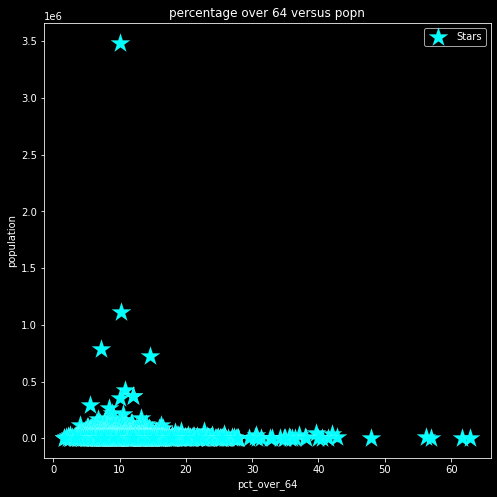

In [14]:
# ---------------------FORMATTING THE GRPAH------------------------------

# setting the background of the inner area of plot to black
plt.rcParams['figure.figsize'] = (8.0,8.0)
plt.rcParams['axes.facecolor'] = 'black'

# outer area of the plot to black
plt.figure(facecolor='black')

# changing the color of the axes, labelling, and text to white
ax = plt.axes()
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# ------------------------------------------------------------------------

plt.scatter(x,y,edgecolors = 'white', linewidth=0.1, color='cyan',marker='*',s=400)
plt.xlabel('pct_over_64')
plt.ylabel('population')
plt.title('percentage over 64 versus popn') 
plt.legend(['Stars'])
plt.show()

Here it is clearly visible that most of the big cities have about 5%-15% of peoples above 64 . So , we can yes this graph is informative and helpful in finding a small relation.



# 2. From this plot we can also conclude that 4 cities have bulk population than others , cities are as Los Angeles city ,San Diego city, San Jose city and San Francisco city.

In [15]:
# top 4 places
# we find 4 such cities, which is having the higher/bulkier population than others 
a = df.nlargest(4, ['population'])

# from the above formatted dataset, we pick out the place and population column
a[['place','population']]

,place,population
0,Los Angeles city,3485398
1,San Diego city,1110549
2,San Jose city,782248
3,San Francisco city,723959


#  3. Regression on log of population and percent over 64 variable

Text(0.5, 1.0, 'population_over_64 Versus Log of population')

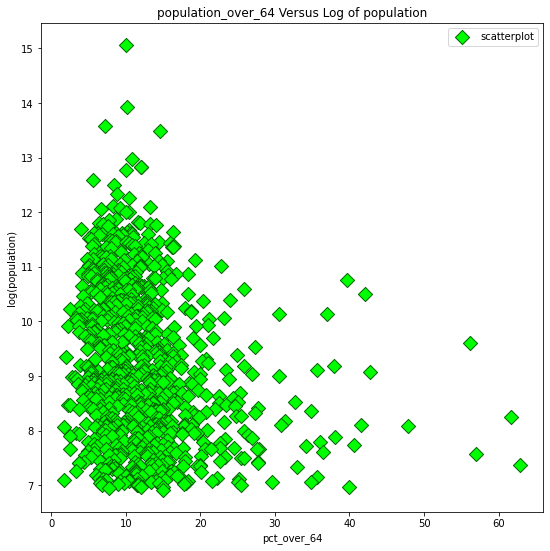

In [27]:
import math
import seaborn as sns
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (9.0,9.0)
X=df['pct_over_64']
Y=np.log(df['population'])

# ---------FORMATTING THE GRAPH TO MAKE IT AESTHETICLLY PLEASING---------
# setting the labelling, axes, text to black color

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# setting the background of the inner area of the plot to white
# (although, by default it's white)
plt.rcParams['axes.facecolor'] = 'white'

# outer area of the plot
plt.figure(facecolor='white')
ax = plt.axes()

# setting the color of the borders in the plotted graph
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
plt.scatter(X,Y,s=100,edgecolors='darkgreen',marker='D',linewidth=1,c='lime')
plt.legend(['scatterplot'])
# ----------------------------------------------------------------------



plt.xlabel("pct_over_64")
plt.ylabel("log(population)")
plt.title("population_over_64 Versus Log of population")

#  4,5.Normal probability plot of remaining variables

In [19]:
# NOTE: red line represent fitted values and blue line represent residulas value.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

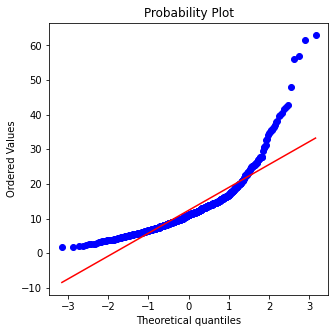

In [28]:
from scipy import stats
import scipy as scipy

plt.rcParams['figure.figsize'] = (5.0,5.0)
stats.probplot(df['pct_over_64'],plot=plt)
plt.figure

### This plot is saying that max peoples above age 64 belong to 5%-15% or we can also say it is also right skewed

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

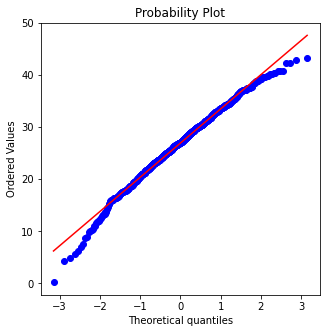

In [31]:
plt.rcParams['figure.figsize'] = (5.0,5.0)
stats.probplot(df['pct_under_18'],plot=plt)

plt.figure

***From this plot we can say that percentage of age under 18 is linear , that means max cities have same percetage distribution among them of under age 18 peoples***

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

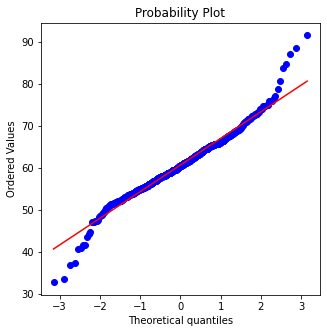

In [32]:
stats.probplot(df['pct_between_18_64'],plot=plt)
plt.figure

*** From this plot it is clear that the population of this category of peoples are skewed on both side ***

# 6. Regression Diagonostic

Text(0, 0.5, "log(df['population']")

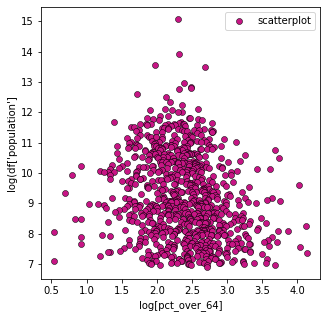

In [33]:
x = np.log(df['pct_over_64'])
y = np.log(df['population'])

# -------------------------------------FORMATTING-------------------------------------------
ax = plt.axes()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (5.0,5.0)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# ------------------------------------------------------------------------------------------

plt.scatter(x, y, c='mediumvioletred', edgecolors='black',linewidth=0.5)

plt.legend(['scatterplot'])

plt.xlabel("log[pct_over_64]")
plt.ylabel("log(df['population']")

##### Isn't this amazing ? As you can see how easily ln has changed our perception over residual vs fit plot . Now the plot is easy to read and make conclusions.

# 7. Outliers using boxplot


c:\users\diksh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_over_64'>

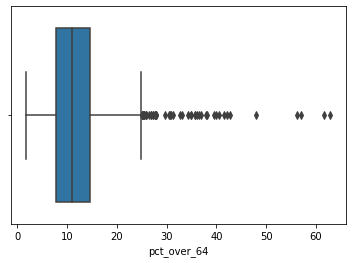

In [24]:
sns.boxplot(df['pct_over_64'])

c:\users\diksh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_under_18'>

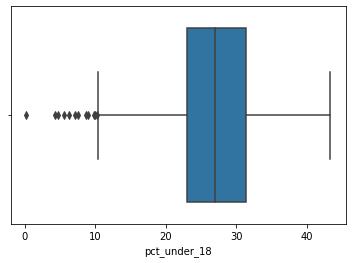

In [25]:
sns.boxplot(df['pct_under_18'])

c:\users\diksh\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pct_between_18_64'>

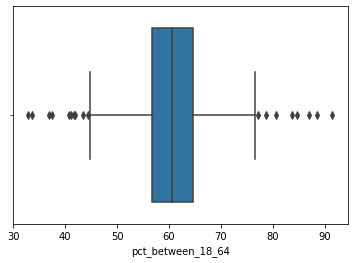

In [26]:
sns.boxplot(df['pct_between_18_64'])

#  Final Conclusions ::

## Maximun cities have around 5%-15% people of above age 64 , but in small cities population of peoples above age 64 is higher. 
